In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import uproot
import pandas as pd


# Chi2 Distributions

In [2]:
def make_plots(dir_name, show_chi2=False, show_chi2_min=False, show_dchi2=True, title=""):

    f_dist = uproot.open(f"../TLee_Np0p/sparse_fc_files/{dir_name}/sub_fit_distribution.root")
    f_data = uproot.open(f"../TLee_Np0p/sparse_fc_files/{dir_name}/sub_fit_data.root")
    f_asimov = uproot.open(f"../TLee_Np0p/sparse_fc_files/{dir_name}/sub_fit_Asimov.root")
    f_mixed = uproot.open(f"../TLee_Np0p/sparse_fc_files/{dir_name}/sub_fit_mixed_Asimov_data.root")

    dist_df = f_dist["tree"].arrays(library="pd")
    data_df = f_data["tree"].arrays(library="pd")
    asimov_df = f_asimov["tree"].arrays(library="pd")
    mixed_df = f_mixed["tree"].arrays(library="pd")

    dist_df = dist_df.groupby(['grid_Np', 'grid_0p']).agg(lambda x: x.tolist()).reset_index()

    figsize = (12, 12)

    if show_chi2:

        fig, axs = plt.subplots(3, 3, figsize=figsize)
        for i in range(1, 4):
            curr_dist_df_s1 = dist_df.query(f"grid_Np == {i}")
            curr_data_df_s1 = data_df.query(f"grid_Np == {i}")
            curr_asimov_df_s1 = asimov_df.query(f"grid_Np == {i}")
            curr_mixed_df_s1 = mixed_df.query(f"grid_Np == {i}")
            plot_j = i - 1
            for j in range(1, 4):
                plot_i = 3 - j
                curr_dist_df = curr_dist_df_s1.query(f"grid_0p == {j}")
                curr_data_df = curr_data_df_s1.query(f"grid_0p == {j}")
                curr_asimov_df = curr_asimov_df_s1.query(f"grid_0p == {j}")
                curr_mixed_df = curr_mixed_df_s1.query(f"grid_0p == {j}")

                dist_chi2s = np.array(curr_dist_df["vec_chi2_var"]).flatten()
                data_chi2 = curr_data_df["vec_chi2_var"].to_numpy().flatten()[0]
                asimov_chi2 = curr_asimov_df["vec_chi2_var"].to_numpy().flatten()[0]
                mixed_chi2 = curr_mixed_df["vec_chi2_var"].to_numpy().flatten()[0]

                bins = np.linspace(0, 200, 51)
                axs[plot_i, plot_j].hist(dist_chi2s, bins=bins, histtype="step")
                axs[plot_i, plot_j].axvline(data_chi2, color="k", label="Data")
                axs[plot_i, plot_j].axvline(asimov_chi2, color="r", label="Asimov")
                axs[plot_i, plot_j].axvline(mixed_chi2, color="b", label="Asimov Sig + Real Constr")

                true_Np = curr_dist_df["true_Np"].to_numpy().flatten()[0][0]
                true_0p = curr_dist_df["true_0p"].to_numpy().flatten()[0][0]
                axs[plot_i, plot_j].text(0.7, 0.8, f"({true_Np}, {true_0p})", fontsize=12, ha='center', va='center', transform=axs[plot_i, plot_j].transAxes)

                if plot_i == 0 and plot_j == 2:
                    axs[plot_i, plot_j].legend()
            
        plt.suptitle(title + r" $\chi^2$ Values")
        plt.show()

    if show_chi2_min:

        fig, axs = plt.subplots(3, 3, figsize=figsize)
        for i in range(1, 4):
            curr_dist_df_s1 = dist_df.query(f"grid_Np == {i}")
            curr_data_df_s1 = data_df.query(f"grid_Np == {i}")
            curr_asimov_df_s1 = asimov_df.query(f"grid_Np == {i}")
            curr_mixed_df_s1 = mixed_df.query(f"grid_Np == {i}")
            plot_j = i - 1
            for j in range(1, 4):
                plot_i = 3 - j
                curr_dist_df = curr_dist_df_s1.query(f"grid_0p == {j}")
                curr_data_df = curr_data_df_s1.query(f"grid_0p == {j}")
                curr_asimov_df = curr_asimov_df_s1.query(f"grid_0p == {j}")
                curr_mixed_df = curr_mixed_df_s1.query(f"grid_0p == {j}")

                dist_chi2s = np.array(curr_dist_df["vec_min_chi2"]).flatten()
                data_chi2 = curr_data_df["vec_min_chi2"].to_numpy().flatten()[0]
                asimov_chi2 = curr_asimov_df["vec_min_chi2"].to_numpy().flatten()[0]
                mixed_chi2 = curr_mixed_df["vec_min_chi2"].to_numpy().flatten()[0]

                bins = np.linspace(0, 200, 51)
                axs[plot_i, plot_j].hist(dist_chi2s, bins=bins, histtype="step")
                axs[plot_i, plot_j].axvline(data_chi2, color="k", label="Data")
                axs[plot_i, plot_j].axvline(asimov_chi2, color="r", label="Asimov")
                axs[plot_i, plot_j].axvline(mixed_chi2, color="b", label="Asimov Sig + Real Constr")

                true_Np = curr_dist_df["true_Np"].to_numpy().flatten()[0][0]
                true_0p = curr_dist_df["true_0p"].to_numpy().flatten()[0][0]
                axs[plot_i, plot_j].text(0.7, 0.8, f"({true_Np}, {true_0p})", fontsize=12, ha='center', va='center', transform=axs[plot_i, plot_j].transAxes)

                if plot_i == 0 and plot_j == 2:
                    axs[plot_i, plot_j].legend()
            
        plt.suptitle(title + r" $\chi^2_\mathrm{min}$ Values")
        plt.show()

    if show_dchi2:

        fig, axs = plt.subplots(3, 3, figsize=figsize)
        for i in range(1, 4):
            curr_dist_df_s1 = dist_df.query(f"grid_Np == {i}")
            curr_data_df_s1 = data_df.query(f"grid_Np == {i}")
            curr_asimov_df_s1 = asimov_df.query(f"grid_Np == {i}")
            curr_mixed_df_s1 = mixed_df.query(f"grid_Np == {i}")
            plot_j = i - 1
            for j in range(1, 4):
                plot_i = 3 - j
                curr_dist_df = curr_dist_df_s1.query(f"grid_0p == {j}")
                curr_data_df = curr_data_df_s1.query(f"grid_0p == {j}")
                curr_asimov_df = curr_asimov_df_s1.query(f"grid_0p == {j}")
                curr_mixed_df = curr_mixed_df_s1.query(f"grid_0p == {j}")

                dist_chi2s = np.array(curr_dist_df["vec_dchi2"]).flatten()
                data_chi2 = curr_data_df["vec_dchi2"].to_numpy().flatten()[0]
                asimov_chi2 = curr_asimov_df["vec_dchi2"].to_numpy().flatten()[0]
                mixed_chi2 = curr_mixed_df["vec_dchi2"].to_numpy().flatten()[0]

                bins = np.linspace(0, 20, 51)
                axs[plot_i, plot_j].hist(dist_chi2s, bins=bins, histtype="step")
                axs[plot_i, plot_j].axvline(data_chi2, color="k", label="Data")
                axs[plot_i, plot_j].axvline(asimov_chi2, color="r", label="Asimov")
                axs[plot_i, plot_j].axvline(mixed_chi2, color="b", label="Asimov Sig + Real Constr")

                true_Np = curr_dist_df["true_Np"].to_numpy().flatten()[0][0]
                true_0p = curr_dist_df["true_0p"].to_numpy().flatten()[0][0]
                axs[plot_i, plot_j].text(0.7, 0.8, f"({true_Np}, {true_0p})", fontsize=12, ha='center', va='center', transform=axs[plot_i, plot_j].transAxes)

                if plot_i == 0 and plot_j == 2:
                    axs[plot_i, plot_j].legend(loc="center right")
            
        plt.suptitle(title + r" $\Delta\chi^2$ Values")
        plt.show()


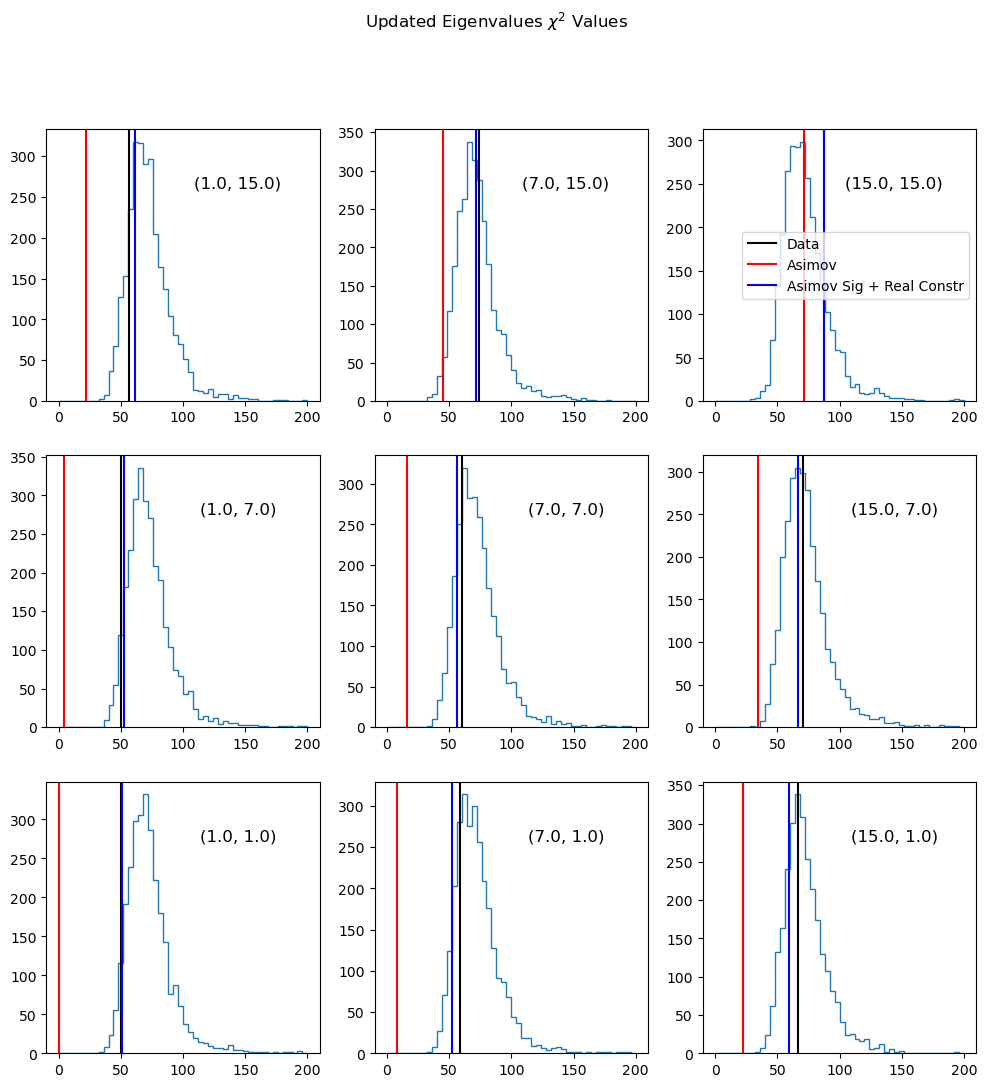

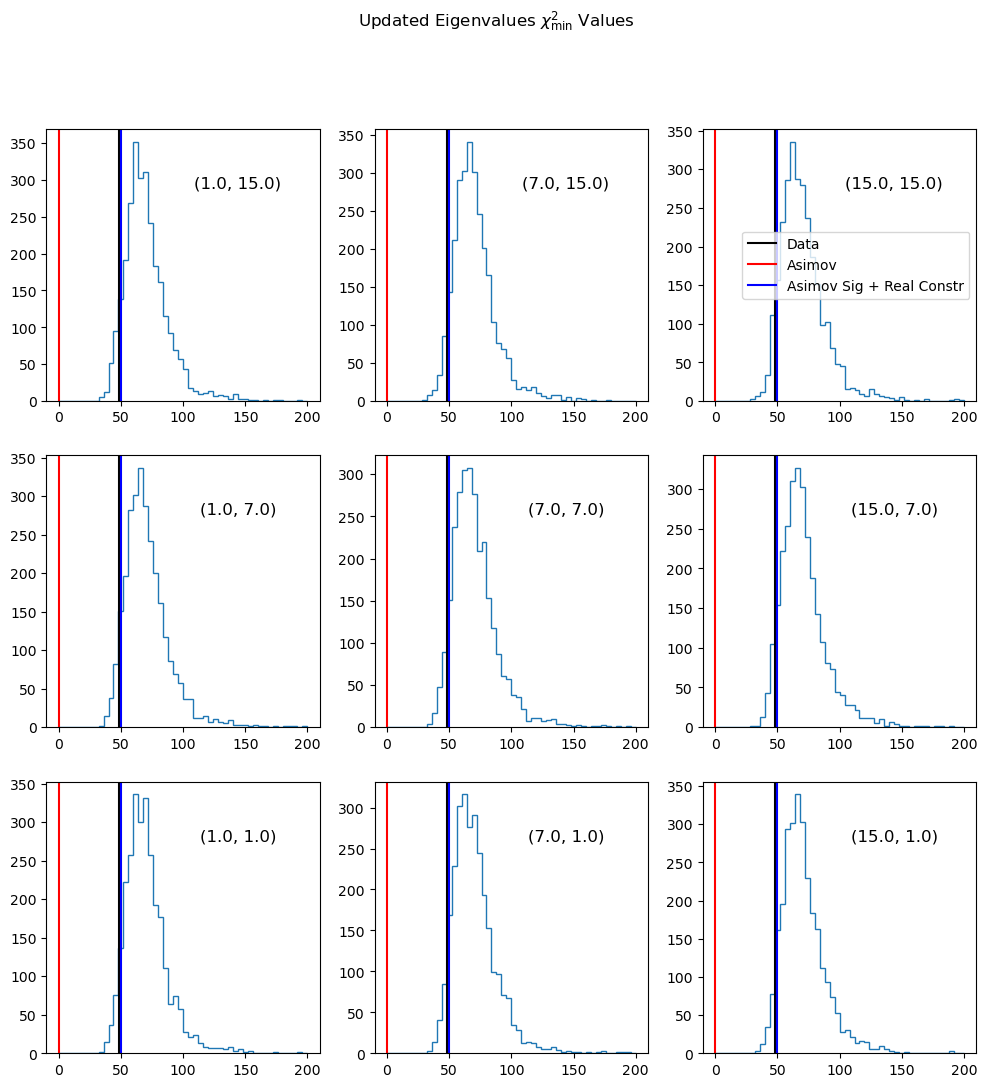

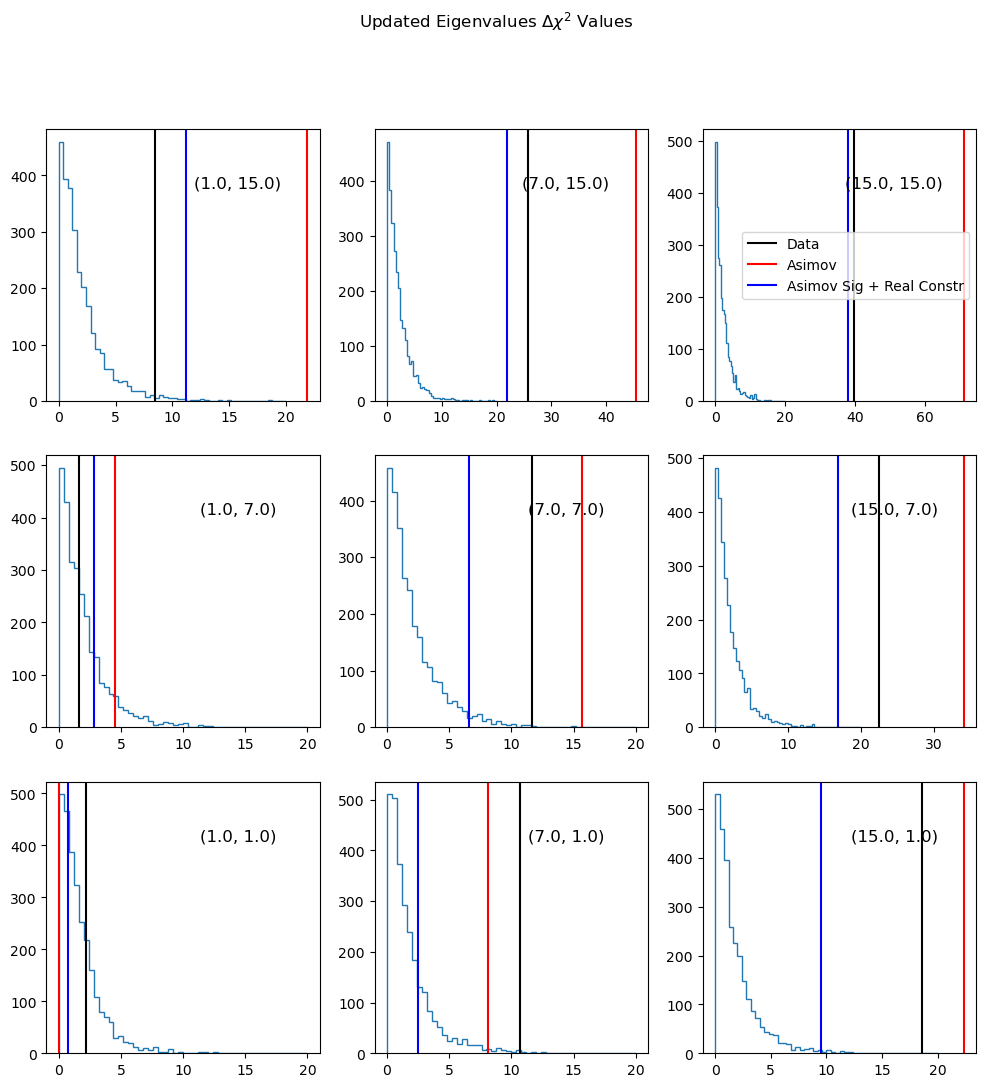

In [3]:
make_plots("updated_eigenvals", title="Updated Eigenvalues", show_chi2=True, show_chi2_min=True, show_dchi2=True)


In [4]:
print(1/0)

ZeroDivisionError: division by zero

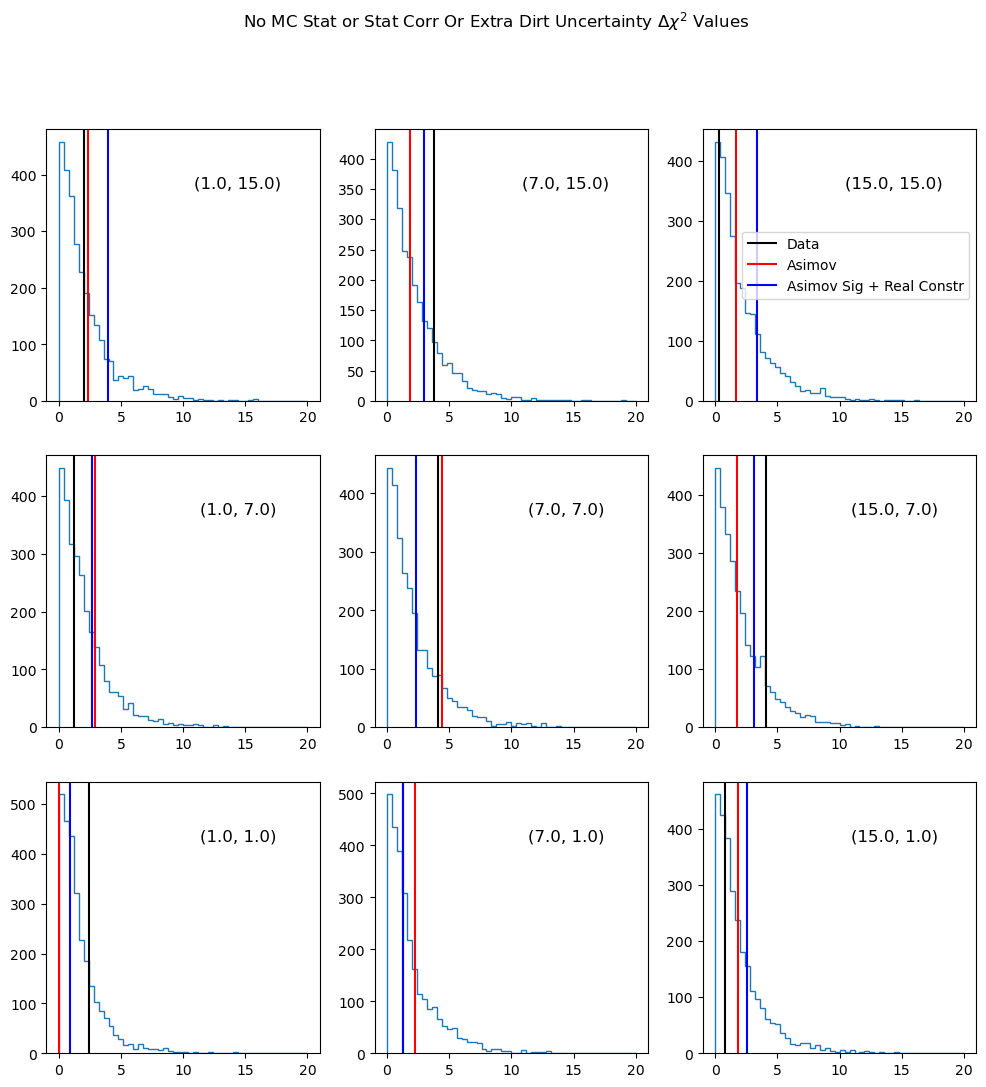

In [ ]:
make_plots("no_mc_stat_or_stat_corr_or_add", title="No MC Stat or Stat Corr Or Extra Dirt Uncertainty", show_chi2=False, show_chi2_min=False, show_dchi2=True)


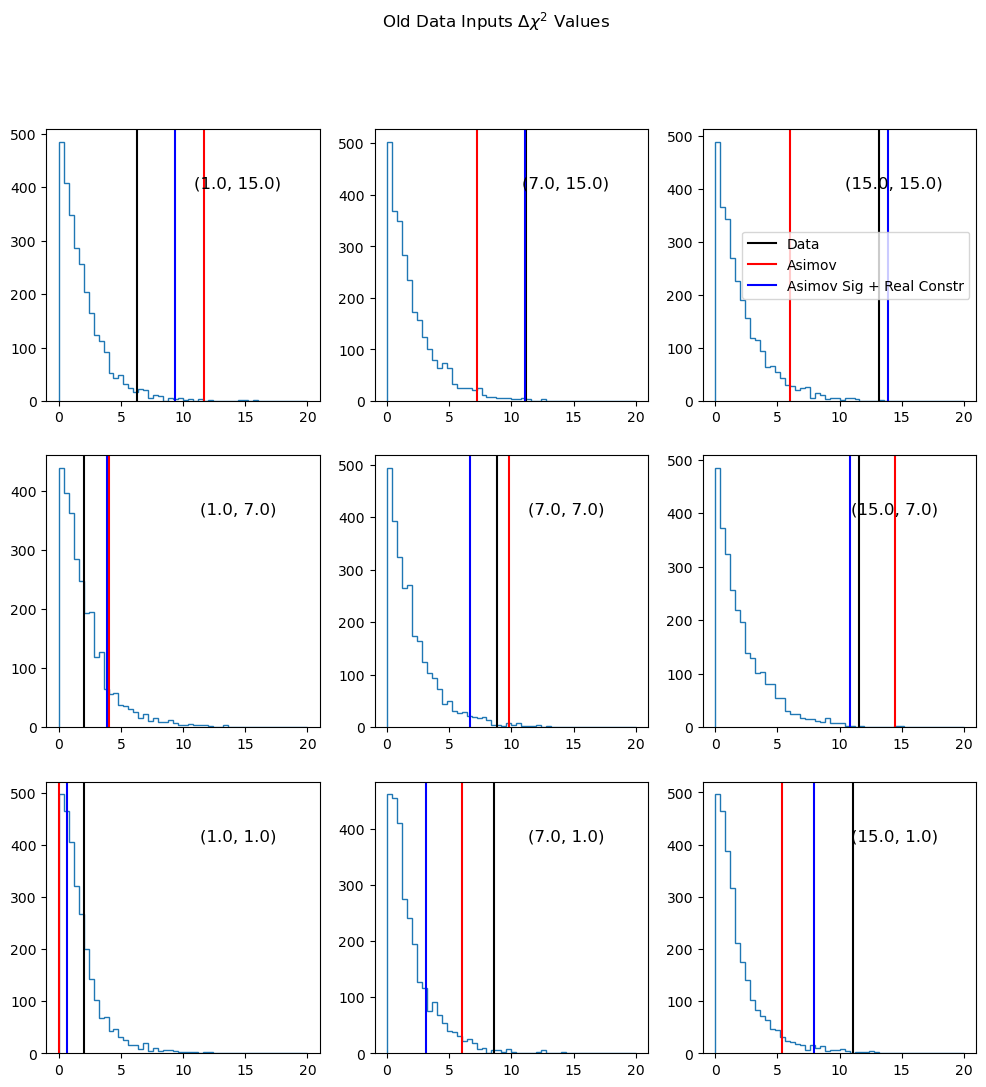

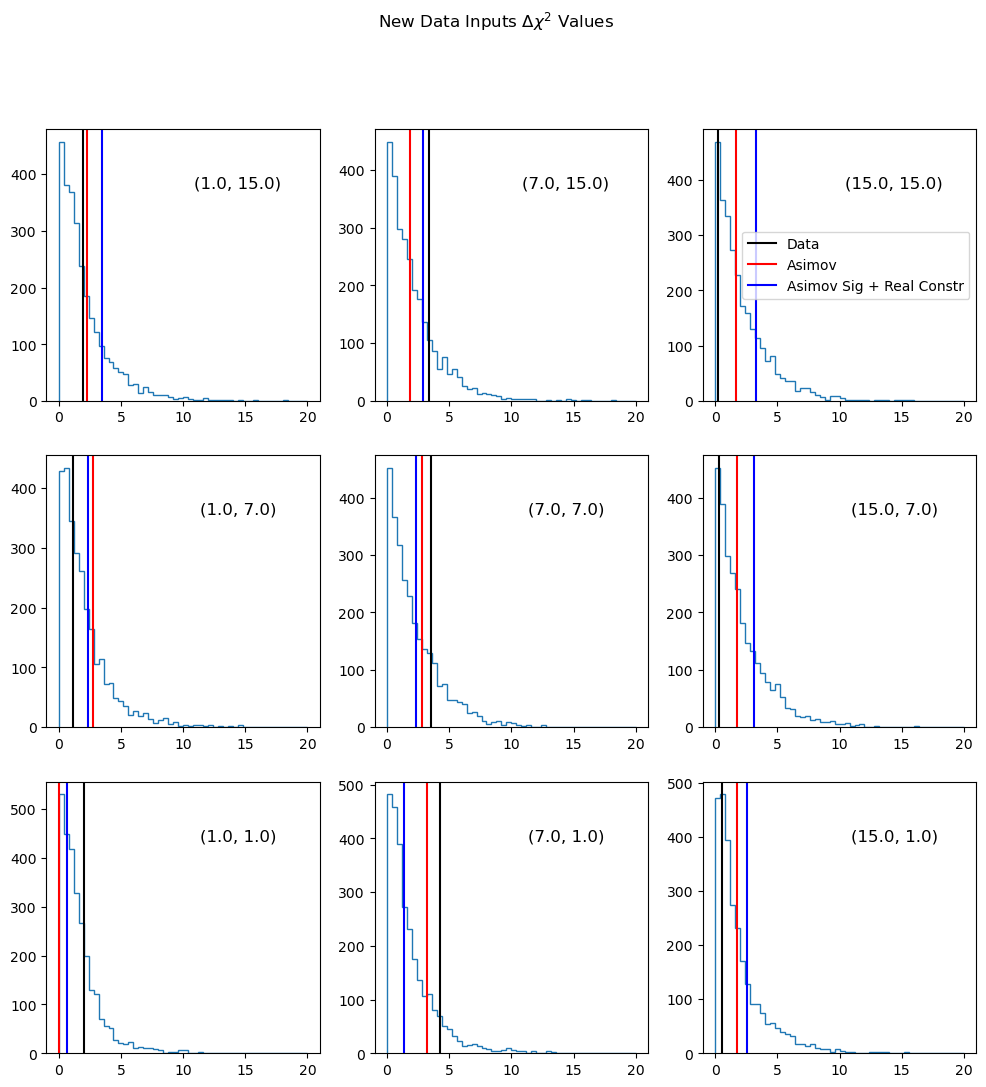

In [ ]:
make_plots("old_data_inputs_nominal", title="Old Data Inputs", show_chi2=False, show_chi2_min=False, show_dchi2=True)
make_plots("nominal_joint", title="New Data Inputs", show_chi2=False, show_chi2_min=False, show_dchi2=True)


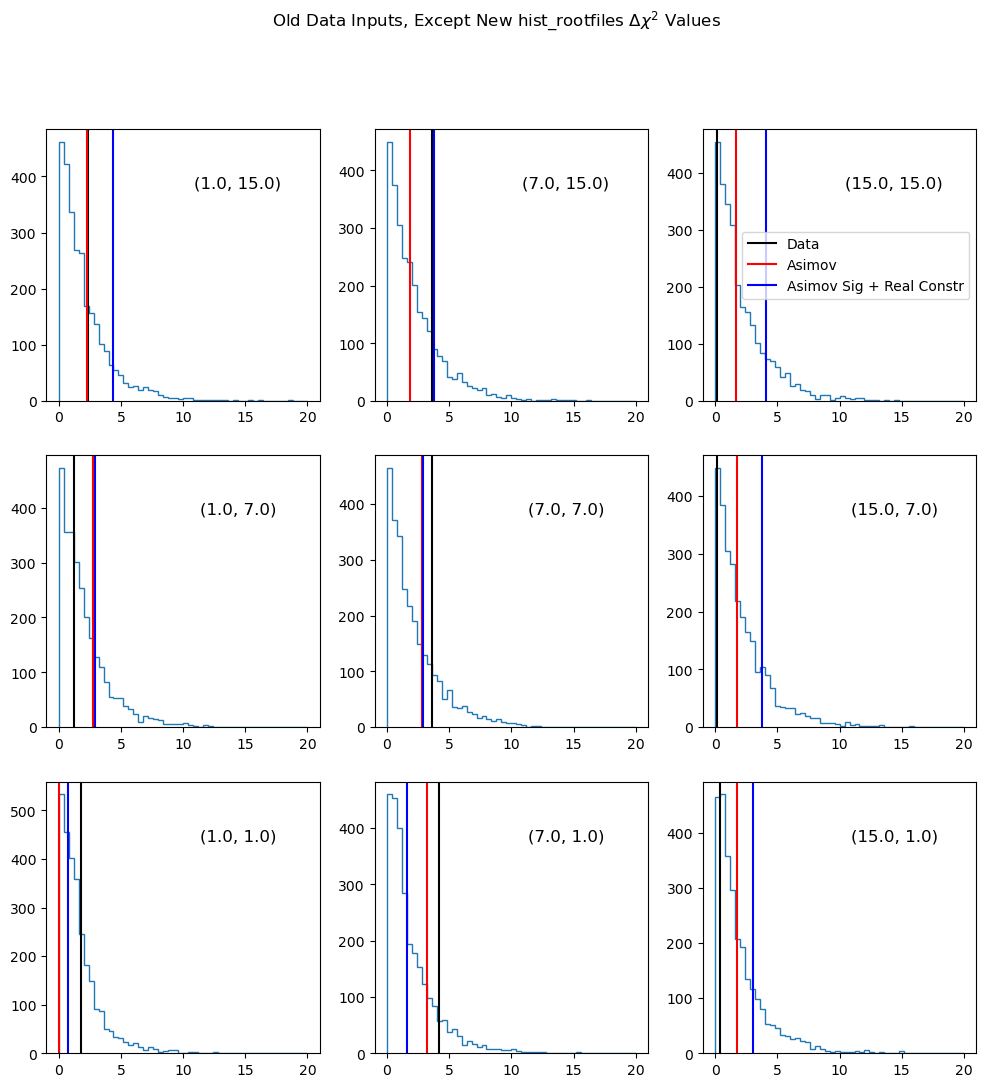

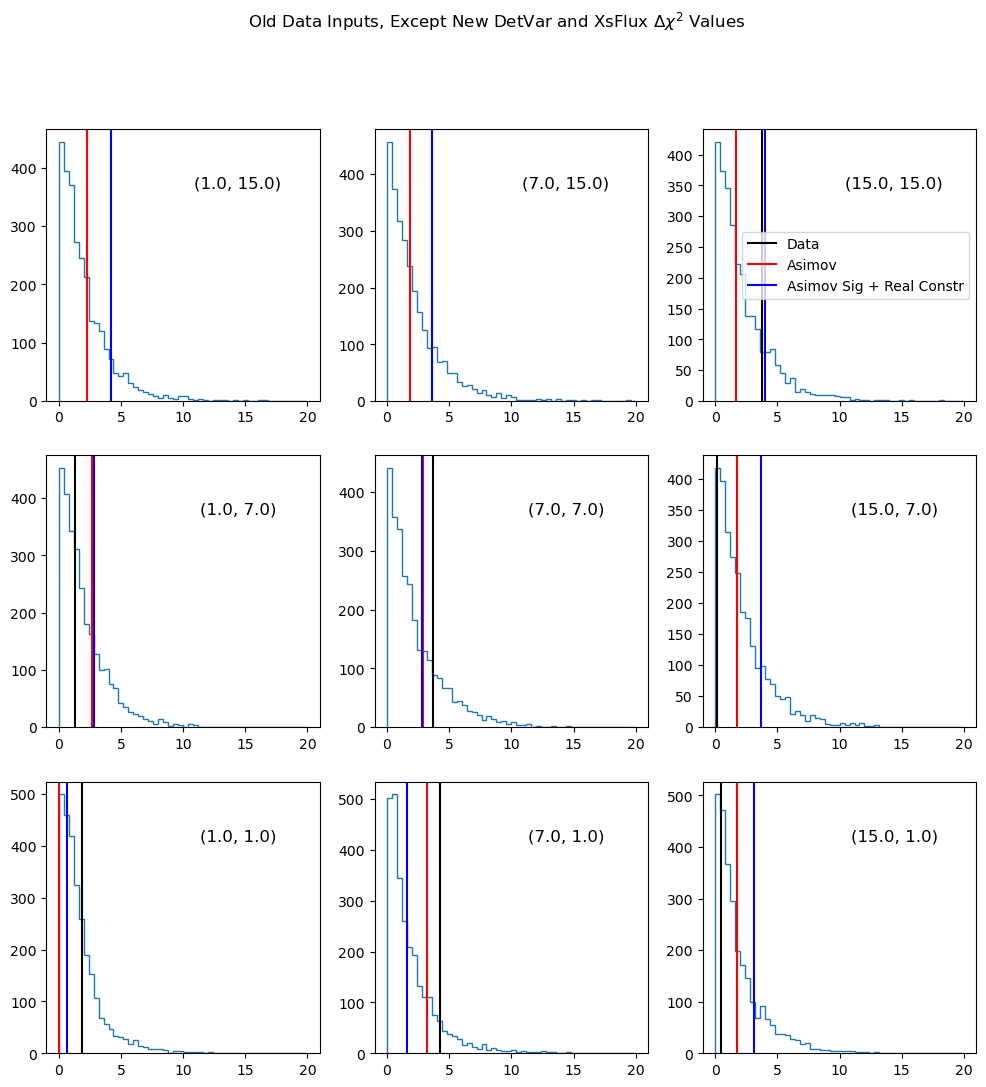

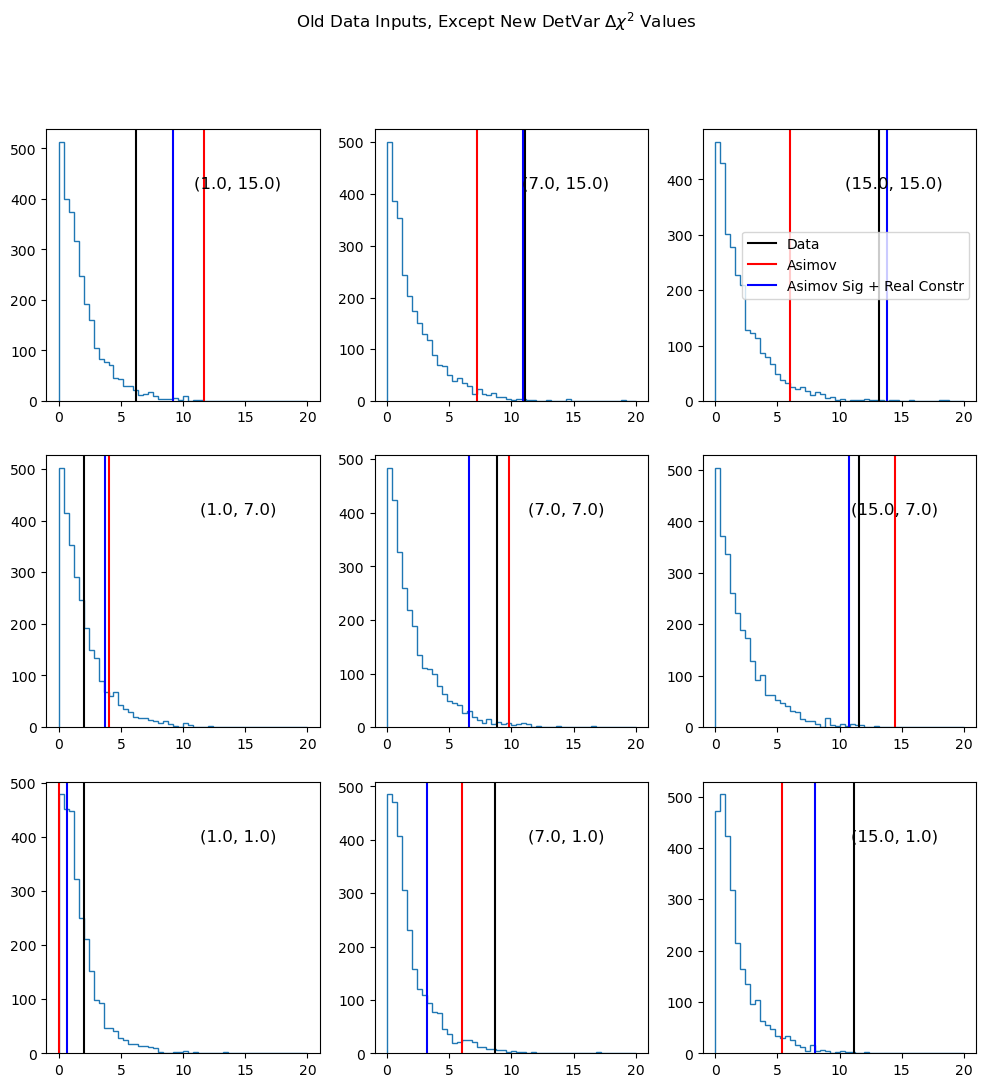

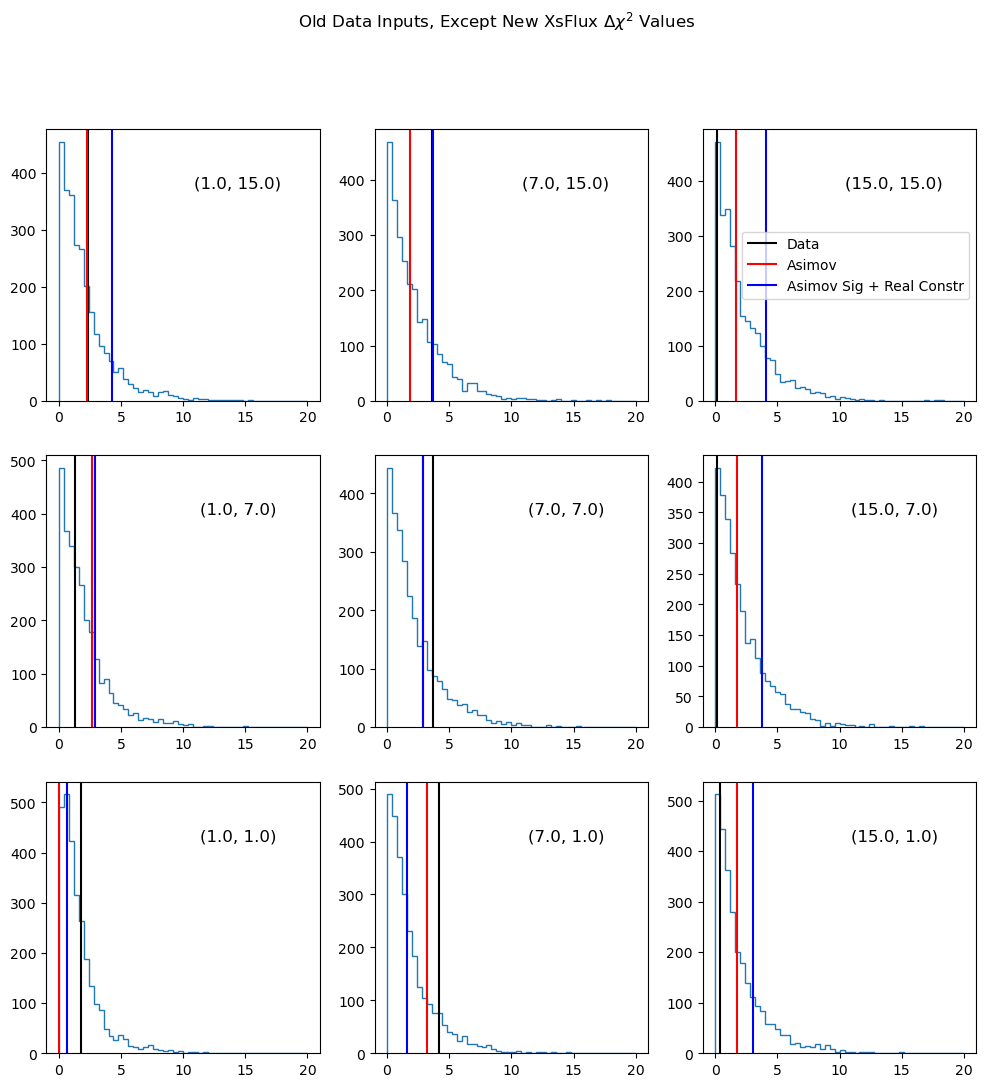

In [ ]:
make_plots("old_data_inputs_but_new_hist_rootfiles", title="Old Data Inputs, Except New hist_rootfiles", show_chi2=False, show_chi2_min=False, show_dchi2=True)
make_plots("old_data_inputs_but_new_XsFlux_DetVar", title="Old Data Inputs, Except New DetVar and XsFlux", show_chi2=False, show_chi2_min=False, show_dchi2=True)
make_plots("old_data_inputs_but_new_DetVar", title="Old Data Inputs, Except New DetVar", show_chi2=False, show_chi2_min=False, show_dchi2=True)
make_plots("old_data_inputs_but_new_XsFlux", title="Old Data Inputs, Except New XsFlux", show_chi2=False, show_chi2_min=False, show_dchi2=True)


In [ ]:
#make_plots("nominal_joint", title="Nominal", show_chi2=True, show_chi2_min=True, show_dchi2=True)


In [ ]:
#make_plots("with_old_data_inputs_no_mc_stat_or_stat_corr_or_add", title="Nominal", show_chi2=True, show_chi2_min=True, show_dchi2=True)


In [ ]:
#make_plots("nominal_joint", title="Nominal")
#make_plots("no_stat_corr_joint", title="No Stat Corr")
#make_plots("no_stat_corr_no_mc_stat_joint", title="No Stat Corr, No MC Stat Err Uncert")
#make_plots("only_flux_xs_joint", title="Only Flux/XS, Data Stat Uncert")

In [ ]:
#make_plots("nominal_joint", title="Nominal", show_chi2=False, show_chi2_min=False, show_dchi2=True)
#make_plots("only_flux_xs_joint", title="Only Flux/XS, Data Stat Uncert", show_chi2=False, show_chi2_min=False, show_dchi2=True)


In [ ]:
print(1/0)

ZeroDivisionError: division by zero

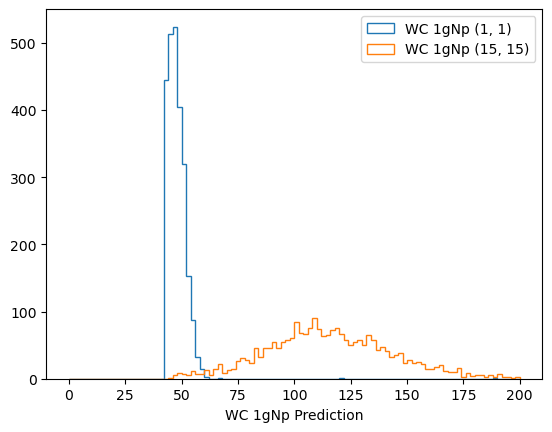

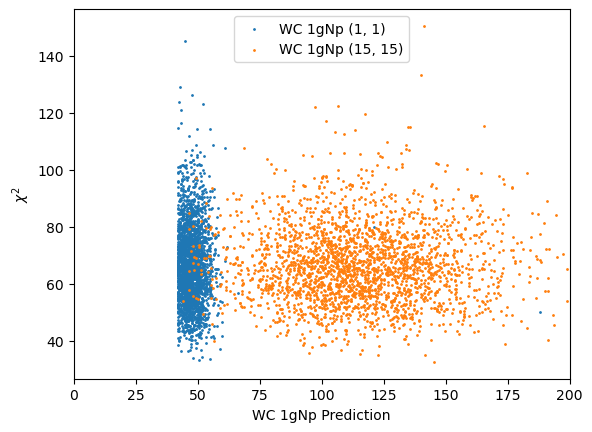

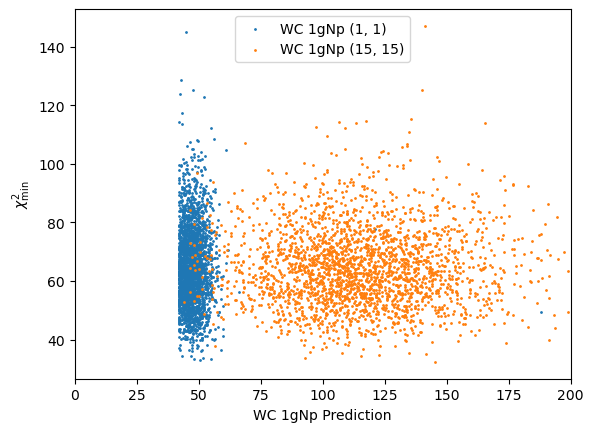

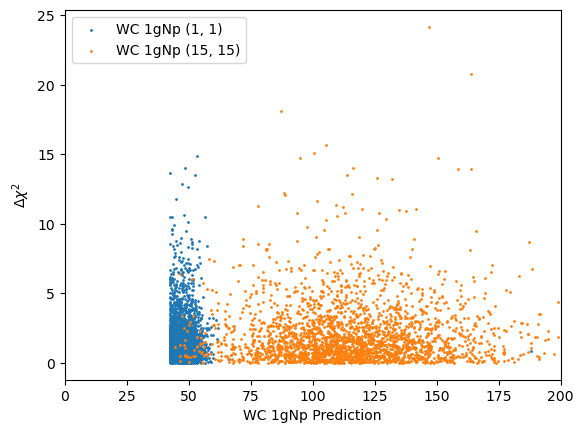

In [ ]:
from collections import defaultdict
spectra = defaultdict(list)
chi2s = defaultdict(list)
chi2_mins = defaultdict(list)
dchi2s = defaultdict(list)

for i in range(1, 26):
    with open(f"../TLee_Np0p/sparse_fc_files/only_flux_xs_joint/spectra_{i}.txt", "r") as f:
        experiments = f.read().split("new pseudo-experiment")[1:]

    for exp in experiments:
        pair = tuple([int(x) for x in exp.split("\n")[0].split()])

        spectrum_text = exp.split("\n")[1]
        spectrum_text_split = spectrum_text.split(" ")
        spectrum_text_split = [x for x in spectrum_text_split if x]
        spectrum = [float(x) for x in spectrum_text_split]


        chi2s_vals_str = exp.split("chi2_var, chi2_min, dchi2: ")[1].split("\n")[0]
        chi2_vals_split = chi2s_vals_str.split(", ")
        chi2_vals = [float(x) for x in chi2_vals_split]
        chi2s[pair].append(chi2_vals[0])
        chi2_mins[pair].append(chi2_vals[1])
        dchi2s[pair].append(chi2_vals[2])

        spectra[pair].append(spectrum)


wc_1gNps_1_1 = [s[0] for s in spectra[(1,1)]]
wc_1gNps_15_15 = [s[0] for s in spectra[(15,15)]]

chi2s_1_1 = chi2s[(1,1)]
chi2s_15_15 = chi2s[(15,15)]

chi2_mins_1_1 = chi2_mins[(1,1)]
chi2_mins_15_15 = chi2_mins[(15,15)]

dchi2s_1_1 = dchi2s[(1,1)]
dchi2s_15_15 = dchi2s[(15,15)]

bins = np.linspace(0, 200, 101)
plt.figure()
plt.hist(wc_1gNps_1_1, bins=bins, histtype="step", label="WC 1gNp (1, 1)")
plt.hist(wc_1gNps_15_15, bins=bins, histtype="step", label="WC 1gNp (15, 15)")
plt.legend()
plt.xlabel("WC 1gNp Prediction")
plt.show()

plt.figure()
plt.scatter(wc_1gNps_1_1, chi2s_1_1, s=1, label="WC 1gNp (1, 1)")
plt.scatter(wc_1gNps_15_15, chi2s_15_15, s=1, label="WC 1gNp (15, 15)")
plt.legend()
plt.xlim(0, 200)
plt.xlabel("WC 1gNp Prediction")
plt.ylabel(r"$\chi^2$")
plt.show()

plt.figure()
plt.scatter(wc_1gNps_1_1, chi2_mins_1_1, s=1, label="WC 1gNp (1, 1)")
plt.scatter(wc_1gNps_15_15, chi2_mins_15_15, s=1, label="WC 1gNp (15, 15)")
plt.legend()
plt.xlim(0, 200)
plt.xlabel("WC 1gNp Prediction")
plt.ylabel(r"$\chi^2_\mathrm{min}$")
plt.show()

plt.figure()
plt.scatter(wc_1gNps_1_1, dchi2s_1_1, s=1, label="WC 1gNp (1, 1)")
plt.scatter(wc_1gNps_15_15, dchi2s_15_15, s=1, label="WC 1gNp (15, 15)")
plt.legend()
plt.xlim(0, 200)
plt.xlabel("WC 1gNp Prediction")
plt.ylabel(r"$\Delta\chi^2$")
plt.show()



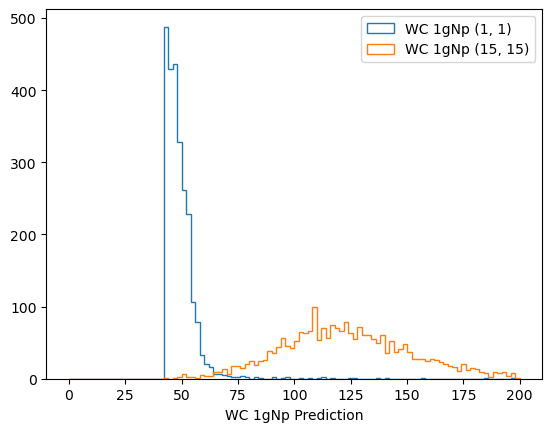

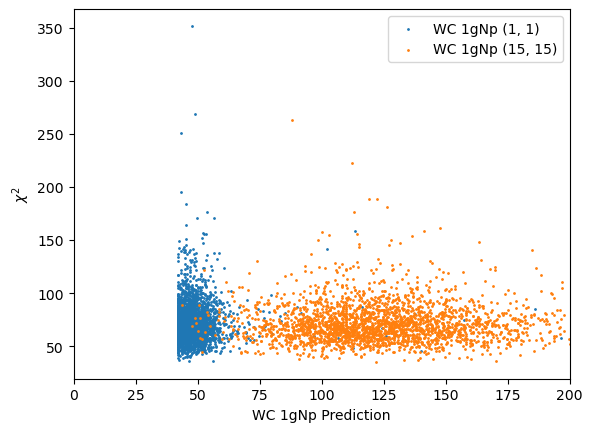

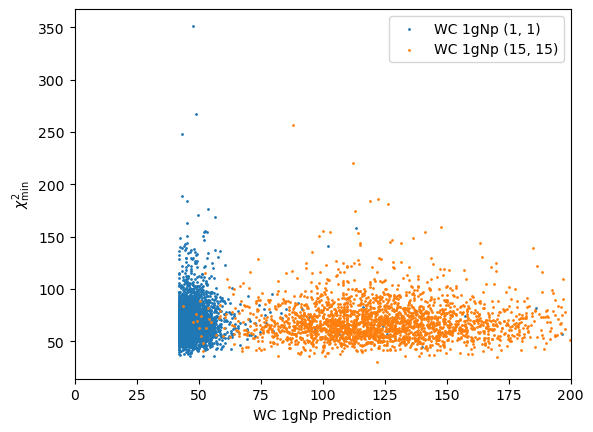

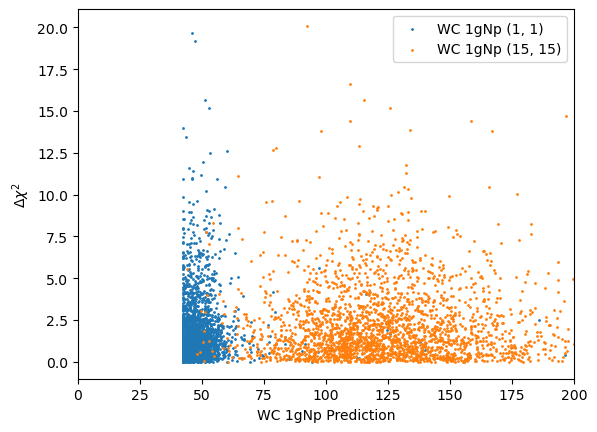

In [ ]:
from collections import defaultdict
spectra = defaultdict(list)
chi2s = defaultdict(list)
chi2_mins = defaultdict(list)
dchi2s = defaultdict(list)

for i in range(1, 26):
    with open(f"../TLee_Np0p/sparse_fc_files/nominal_joint/spectra_{i}.txt", "r") as f:
        experiments = f.read().split("new pseudo-experiment")[1:]

    for exp in experiments:
        pair = tuple([int(x) for x in exp.split("\n")[0].split()])

        spectrum_text = exp.split("\n")[1]
        spectrum_text_split = spectrum_text.split(" ")
        spectrum_text_split = [x for x in spectrum_text_split if x]
        spectrum = [float(x) for x in spectrum_text_split]


        chi2s_vals_str = exp.split("chi2_var, chi2_min, dchi2: ")[1].split("\n")[0]
        chi2_vals_split = chi2s_vals_str.split(", ")
        chi2_vals = [float(x) for x in chi2_vals_split]
        chi2s[pair].append(chi2_vals[0])
        chi2_mins[pair].append(chi2_vals[1])
        dchi2s[pair].append(chi2_vals[2])

        spectra[pair].append(spectrum)


wc_1gNps_1_1 = [s[0] for s in spectra[(1,1)]]
wc_1gNps_15_15 = [s[0] for s in spectra[(15,15)]]

chi2s_1_1 = chi2s[(1,1)]
chi2s_15_15 = chi2s[(15,15)]

chi2_mins_1_1 = chi2_mins[(1,1)]
chi2_mins_15_15 = chi2_mins[(15,15)]

dchi2s_1_1 = dchi2s[(1,1)]
dchi2s_15_15 = dchi2s[(15,15)]

bins = np.linspace(0, 200, 101)
plt.figure()
plt.hist(wc_1gNps_1_1, bins=bins, histtype="step", label="WC 1gNp (1, 1)")
plt.hist(wc_1gNps_15_15, bins=bins, histtype="step", label="WC 1gNp (15, 15)")
plt.legend()
plt.xlabel("WC 1gNp Prediction")
plt.show()

plt.figure()
plt.scatter(wc_1gNps_1_1, chi2s_1_1, s=1, label="WC 1gNp (1, 1)")
plt.scatter(wc_1gNps_15_15, chi2s_15_15, s=1, label="WC 1gNp (15, 15)")
plt.legend()
plt.xlim(0, 200)
plt.xlabel("WC 1gNp Prediction")
plt.ylabel(r"$\chi^2$")
plt.show()

plt.figure()
plt.scatter(wc_1gNps_1_1, chi2_mins_1_1, s=1, label="WC 1gNp (1, 1)")
plt.scatter(wc_1gNps_15_15, chi2_mins_15_15, s=1, label="WC 1gNp (15, 15)")
plt.legend()
plt.xlim(0, 200)
plt.xlabel("WC 1gNp Prediction")
plt.ylabel(r"$\chi^2_\mathrm{min}$")
plt.show()

plt.figure()
plt.scatter(wc_1gNps_1_1, dchi2s_1_1, s=1, label="WC 1gNp (1, 1)")
plt.scatter(wc_1gNps_15_15, dchi2s_15_15, s=1, label="WC 1gNp (15, 15)")
plt.legend()
plt.xlim(0, 200)
plt.xlabel("WC 1gNp Prediction")
plt.ylabel(r"$\Delta\chi^2$")
plt.show()



# Best Fit Points

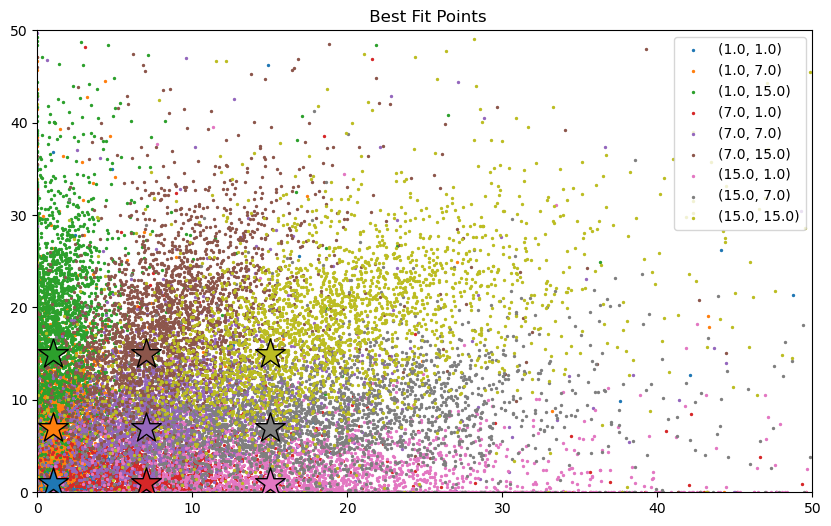

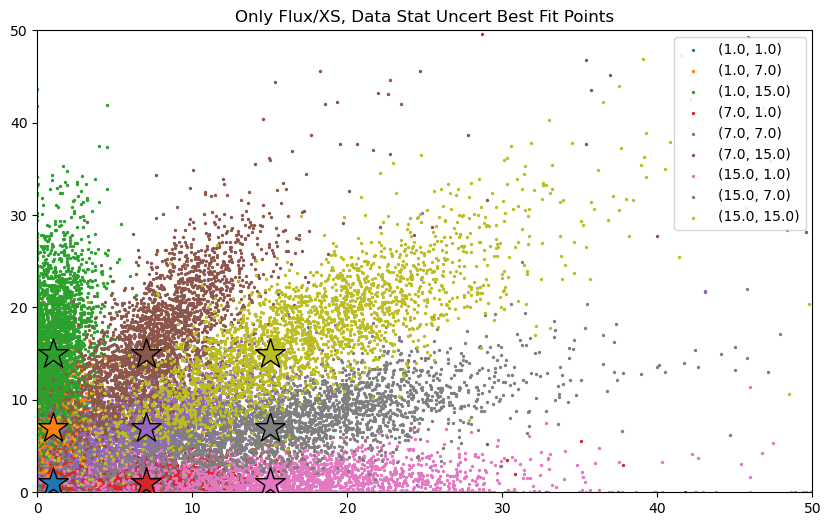

In [ ]:
def make_plots(dir_name, show_chi2=False, show_chi2_min=False, show_dchi2=True, title=""):

    f_dist = uproot.open(f"../TLee_Np0p/sparse_fc_files/{dir_name}/sub_fit_distribution.root")
    f_data = uproot.open(f"../TLee_Np0p/sparse_fc_files/{dir_name}/sub_fit_data.root")
    f_asimov = uproot.open(f"../TLee_Np0p/sparse_fc_files/{dir_name}/sub_fit_Asimov.root")
    f_mixed = uproot.open(f"../TLee_Np0p/sparse_fc_files/{dir_name}/sub_fit_mixed_Asimov_data.root")

    dist_df = f_dist["tree"].arrays(library="pd")
    data_df = f_data["tree"].arrays(library="pd")
    asimov_df = f_asimov["tree"].arrays(library="pd")
    mixed_df = f_mixed["tree"].arrays(library="pd")

    dist_df = dist_df.groupby(['grid_Np', 'grid_0p']).agg(lambda x: x.tolist()).reset_index()

    plt.figure(figsize=(10, 6))

    for i in range(1, 4):
        curr_dist_df_s1 = dist_df.query(f"grid_Np == {i}")
        curr_data_df_s1 = data_df.query(f"grid_Np == {i}")
        curr_asimov_df_s1 = asimov_df.query(f"grid_Np == {i}")
        curr_mixed_df_s1 = mixed_df.query(f"grid_Np == {i}")
        for j in range(1, 4):
            curr_dist_df = curr_dist_df_s1.query(f"grid_0p == {j}")
            curr_data_df = curr_data_df_s1.query(f"grid_0p == {j}")
            curr_asimov_df = curr_asimov_df_s1.query(f"grid_0p == {j}")
            curr_mixed_df = curr_mixed_df_s1.query(f"grid_0p == {j}")

            best_fit_Np_vals = curr_dist_df["vec_min_fNp_val"].to_numpy().flatten()
            best_fit_0p_vals = curr_dist_df["vec_min_f0p_val"].to_numpy().flatten()

            data_Np_val = curr_data_df["vec_min_fNp_val"].to_numpy().flatten()[0]
            data_0p_val = curr_data_df["vec_min_f0p_val"].to_numpy().flatten()[0]

            true_Np = curr_dist_df["true_Np"].to_numpy().flatten()[0][0]
            true_0p = curr_dist_df["true_0p"].to_numpy().flatten()[0][0]

            plt.scatter(best_fit_Np_vals, best_fit_0p_vals, label=f"({true_Np}, {true_0p})", s=2, color=f"C{i*3+j-4}")
            plt.scatter(true_Np, true_0p, s=500, color=f"C{i*3+j-4}", marker="*", zorder=10, edgecolor="k", linewidth=1)

    plt.xlim(0, 50)
    plt.ylim(0, 50)
    plt.title(title + " Best Fit Points")
    plt.legend()
    plt.show()


make_plots("nominal_joint")

make_plots("only_flux_xs_joint", title="Only Flux/XS, Data Stat Uncert")